In [1]:
## importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stations_labels = pd.read_csv("D:\ds\data\stations_label_city.csv")
print(stations_labels.head())
df = pd.read_csv("D:\ds\data\station_daily.csv")
print(df.head())
df = df.merge(stations_labels, on="StationId")
print(df.head())

  StationId                                     StationName  \
0     AP001                  Secretariat, Amaravati - APPCB   
1     AP002  Anand Kala Kshetram, Rajamahendravaram - APPCB   
2     AP003                      Tirumala, Tirupati - APPCB   
3     AP004                 PWD Grounds, Vijayawada - APPCB   
4     AP005          GVM Corporation, Visakhapatnam - APPCB   

                City           State  
0          Amaravati  Andhra Pradesh  
1  Rajamahendravaram  Andhra Pradesh  
2           Tirupati  Andhra Pradesh  
3         Vijayawada  Andhra Pradesh  
4      Visakhapatnam  Andhra Pradesh  
  StationId        Date  PM2.5    PM10    NO    NO2    NOx    NH3    CO  \
0     AP001  2017-11-24  71.36  115.75  1.75  20.65  12.40  12.19  0.10   
1     AP001  2017-11-25  81.40  124.50  1.44  20.50  12.08  10.72  0.12   
2     AP001  2017-11-26  78.32  129.06  1.26  26.00  14.85  10.28  0.14   
3     AP001  2017-11-27  88.76  135.32  6.60  30.85  21.77  12.91  0.11   
4     AP001 

In [3]:

df = df[df.StationId.isin(["DL001"])]
df.sort_values(["StationId", "Date"], inplace = True)
df["Dates"] = pd.to_datetime(df['Date'])
df.Date = df.Date.astype(str)
df = df.set_index(['Dates'])
df = df.loc["2020-03-01":"2020-05-31"]

print(df.head())
extras = df.columns[2:14]
df.drop(extras, axis=1, inplace=True)
df.drop(["StationName"], axis=1, inplace=True)
print(df.head())

           StationId        Date  PM2.5    PM10     NO    NO2    NOx    NH3  \
Dates                                                                         
2020-03-01     DL001  2020-03-01  43.65   76.92   2.86  35.12  21.01  24.57   
2020-03-02     DL001  2020-03-02  87.68  178.92  42.14  49.19  60.51  27.15   
2020-03-03     DL001  2020-03-03  97.69  193.17  40.67  44.32  56.75  27.28   
2020-03-04     DL001  2020-03-04  91.69  154.94  15.48  40.98  34.41  27.92   
2020-03-05     DL001  2020-03-05  28.72   43.58   2.82  30.40  18.48  25.07   

              CO    SO2     O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  \
Dates                                                                           
2020-03-01  0.67  10.93  32.39     0.29     2.16    0.01   88.0  Satisfactory   
2020-03-02  1.29  15.83  20.75     0.52     4.27    0.12  154.0      Moderate   
2020-03-03  1.06  14.73  23.36     0.56     9.31    0.53  234.0          Poor   
2020-03-04  1.03   9.40  16.59     0.54  

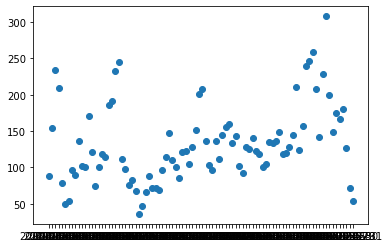

In [4]:

plt.scatter(df.Date, df.AQI)
plt.show()

In [5]:
covid_data = pd.read_csv("D:\ds\data\who-covid-19.csv")
print(covid_data.head())

covid_data = covid_data.loc[covid_data['Country'] == "India"]
covid_data["Date"] = pd.to_datetime(covid_data['Date_reported'])
covid_data.Date_reported = covid_data.Date_reported.astype(str)
covid_data = covid_data.set_index(['Date'])
extras = covid_data.columns[1:4]
covid_data.drop(extras, axis=1, inplace=True)
extras = covid_data.columns[2:5]
covid_data.drop(extras, axis=1, inplace=True)
covid_data = covid_data.loc["2020-03-01":"2020-05-31"]
print(covid_data.head())

  Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-03           AF  Afghanistan       EMRO          0   
1    2020-01-04           AF  Afghanistan       EMRO          0   
2    2020-01-05           AF  Afghanistan       EMRO          0   
3    2020-01-06           AF  Afghanistan       EMRO          0   
4    2020-01-07           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0  
           Date_reported  New_cases
Date                               
2020-03-01    2020-03-01          0
2020-03-02    2020-03-02         -2
2020-03-03    2020-03-03          4
2020-03-04    2020-03-04         19
2020-03-05    2020-03-05          1


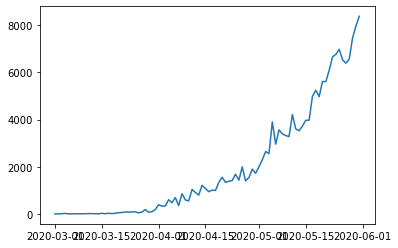

In [6]:
plt.plot(covid_data.index, covid_data.New_cases)
plt.show()

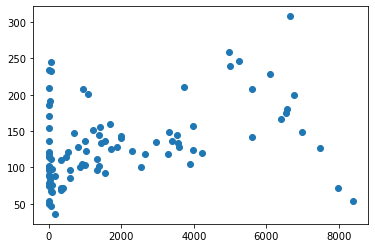

In [7]:
plt.scatter(covid_data.New_cases, df.AQI)
plt.show()

In [8]:
df.dtypes
df.info()
df.nunique()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-03-01 to 2020-05-31
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StationId   92 non-null     object 
 1   Date        92 non-null     object 
 2   AQI         92 non-null     float64
 3   AQI_Bucket  92 non-null     object 
 4   City        92 non-null     object 
 5   State       92 non-null     object 
dtypes: float64(1), object(5)
memory usage: 3.2+ KB


StationId      1
Date          92
AQI           72
AQI_Bucket     5
City           1
State          1
dtype: int64

In [9]:
covid_data.dtypes
covid_data.info()
covid_data.nunique()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-03-01 to 2020-05-31
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date_reported  92 non-null     object
 1   New_cases      92 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


Date_reported    92
New_cases        89
dtype: int64

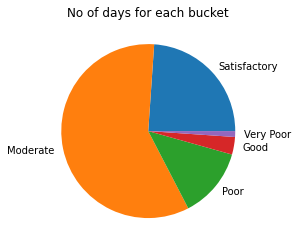

In [26]:
bucket = df.AQI_Bucket.unique()
list=[]
for x in bucket:
    list.append(len(df[df['AQI_Bucket']==x].index))

plt.pie(list, labels=bucket)
plt.title("No of days for each bucket")
plt.show()